In [1]:
import numpy as np   # Downloading numpy for array format
import pandas as pd  # Downloading pandas for data import
import matplotlib.pyplot as plt # Matplotlib.pyplot for visualization
import seaborn as sns  # Visualisation
%matplotlib inline 

In [2]:
oil_prices=pd.read_csv('crude_oil_import_prices.csv') # importing the dataset

oil_prices.head(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,OILIMPPRICE,TOT,USD_BAR,A,1980,31.81,NaN
1,AUS,OILIMPPRICE,TOT,USD_BAR,A,1981,35.88,NaN
2,AUS,OILIMPPRICE,TOT,USD_BAR,A,1982,35.42,NaN
3,AUS,OILIMPPRICE,TOT,USD_BAR,A,1983,30.88,NaN
4,AUS,OILIMPPRICE,TOT,USD_BAR,A,1984,29.19,NaN
5,AUS,OILIMPPRICE,TOT,USD_BAR,A,1985,28.17,NaN
6,AUS,OILIMPPRICE,TOT,USD_BAR,A,1986,14.49,NaN
7,AUS,OILIMPPRICE,TOT,USD_BAR,A,1987,19.00,NaN
8,AUS,OILIMPPRICE,TOT,USD_BAR,A,1988,15.93,NaN
9,AUS,OILIMPPRICE,TOT,USD_BAR,A,1989,17.63,NaN


In [3]:
oil_prices.shape # Getting shape  of data

(17360, 8)

In [4]:
oil_prices.info()   # checking nulls and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17360 entries, 0 to 17359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    17360 non-null  object 
 1   INDICATOR   17360 non-null  object 
 2   SUBJECT     17360 non-null  object 
 3   MEASURE     17360 non-null  object 
 4   FREQUENCY   17360 non-null  object 
 5   TIME        17360 non-null  object 
 6   Value       9734 non-null   float64
 7   Flag Codes  7626 non-null   object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


In [5]:
oil_prices.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes     object
dtype: object

In [6]:
oil_prices=oil_prices.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'Flag Codes'], axis=1)

oil_prices.head(5)

,LOCATION,FREQUENCY,TIME,Value
0,AUS,A,1980,31.81
1,AUS,A,1981,35.88
2,AUS,A,1982,35.42
3,AUS,A,1983,30.88
4,AUS,A,1984,29.19


In [7]:
oil_prices.dtypes

LOCATION      object
FREQUENCY     object
TIME          object
Value        float64
dtype: object

In [8]:
oil_prices.shape

(17360, 4)

In [9]:
oil_prices.describe()     # Basic statistical info - seems to skew to the left

,Value
count,9734.000000
mean,41.376256
std,31.575795
min,2.330000
25%,18.350000
50%,28.560000
75%,56.265000
max,142.290000


In [10]:
oil_prices=oil_prices.sort_values(by='TIME') # sort the data by year

oil_prices.head(10)
oil_prices.tail(5)

,LOCATION,FREQUENCY,TIME,Value
2833,JPN,Q,2016-Q2,41.95
2541,IRL,Q,2016-Q2,NaN
4439,TUR,Q,2016-Q2,NaN
4585,GBR,Q,2016-Q2,45.65
3709,PRT,Q,2016-Q2,NaN


In [11]:
oil_prices['TIME']=oil_prices['TIME'].str.slice(0, 4) # Removed extra characters from time column

oil_prices.tail(5)


,LOCATION,FREQUENCY,TIME,Value
2833,JPN,Q,2016,41.95
2541,IRL,Q,2016,NaN
4439,TUR,Q,2016,NaN
4585,GBR,Q,2016,45.65
3709,PRT,Q,2016,NaN


In [12]:
oil_prices.count()  # checking balance of observations between columns

LOCATION     17360
FREQUENCY    17360
TIME         17360
Value         9734
dtype: int64

In [13]:
oil_prices.shape # Checkpoint on shape

(17360, 4)

In [14]:
#duplicate_rows=oil_prices[oil_prices.duplicated()]

#print("number of duplicate rows:", duplicate_rows.shape)

In [15]:
print(oil_prices.isnull().sum())  # Looking for null values

LOCATION        0
FREQUENCY       0
TIME            0
Value        7626
dtype: int64


In [16]:
value_column_row_null= oil_prices[oil_prices['Value'].isnull()] # Seeing if any pattern in the null values

value_column_row_null.head(100)

,LOCATION,FREQUENCY,TIME,Value
252,FRA,A,1980,NaN
144,CZE,A,1980,NaN
828,TUR,A,1980,NaN
684,SVK,A,1980,NaN
612,POL,A,1980,NaN
...,...,...,...,...
14374,CHE,M,1980,NaN
7366,FIN,M,1980,NaN
16928,LUX,M,1980,NaN
12622,PRT,M,1980,NaN


In [17]:
oil_prices=oil_prices.dropna().reset_index(drop=True)

oil_prices.count()

LOCATION     9734
FREQUENCY    9734
TIME         9734
Value        9734
dtype: int64

In [18]:
oil_prices.shape

(9734, 4)

In [19]:
oil_prices.head(15)

,LOCATION,FREQUENCY,TIME,Value
0,AUS,A,1980,31.81
1,CAN,A,1980,30.21
2,USA,A,1980,33.39
3,GBR,A,1980,31.22
4,CHE,A,1980,34.68
5,SWE,A,1980,32.22
6,ESP,A,1980,32.25
7,DNK,A,1980,33.56
8,BEL,A,1980,29.93
9,NOR,A,1980,33.17


In [20]:
oil_prices= oil_prices[oil_prices['FREQUENCY']=='M'].reset_index(drop=True) 

oil_prices.head(20)      # removed all data that wasn't monthly for consistent interval frequency

,LOCATION,FREQUENCY,TIME,Value
0,ESP,M,1980,29.49
1,AUS,M,1980,27.81
2,AUT,M,1980,30.32
3,JPN,M,1980,31.70
4,GBR,M,1980,28.56
5,CAN,M,1980,26.21
6,DNK,M,1980,31.24
7,NLD,M,1980,28.40
8,BEL,M,1980,26.18
9,ITA,M,1980,28.59


<AxesSubplot:xlabel='Value'>

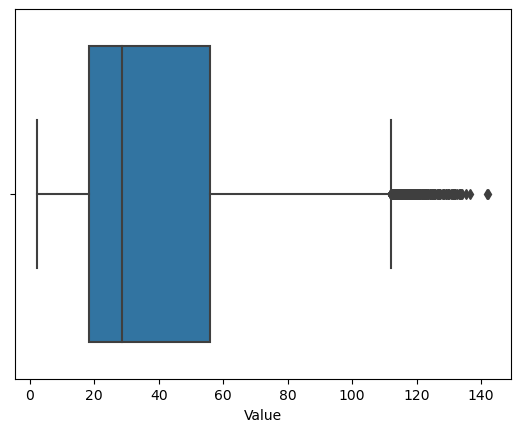

In [21]:
sns.boxplot(x=oil_prices['Value'])      # view of the data which is skewed to the left

In [22]:
oil_prices=oil_prices.sort_values(by=['TIME', 'LOCATION']).reset_index(drop=True)

In [23]:
oil_prices.tail(50)   # Data now sorted by year and alphabetically by countries within each year for trend

,LOCATION,FREQUENCY,TIME,Value
6566,FRA,M,2016,37.51
6567,FRA,M,2016,40.48
6568,FRA,M,2016,48.44
6569,GBR,M,2016,33.36
6570,GBR,M,2016,32.13
6571,GBR,M,2016,38.87
6572,GBR,M,2016,41.51
6573,GBR,M,2016,46.84
6574,GBR,M,2016,49.27
6575,ITA,M,2016,30.47


In [24]:
country_counts=oil_prices.groupby(['LOCATION', 'TIME']).size().reset_index(name='Count')

In [25]:
country_counts.head(50)  # counting how many months are recorded per country in each year for data consistency

,LOCATION,TIME,Count
0,AUS,1980,12
1,AUS,1981,12
2,AUS,1982,12
3,AUS,1983,12
4,AUS,1984,11
5,AUS,1985,11
6,AUS,1986,8
7,AUS,1987,9
8,AUS,1988,12
9,AUS,1989,11


In [26]:
oil_prices=oil_prices.merge(country_counts, on=['LOCATION', 'TIME'], how='left') # merging country_counts to oil_prices

In [27]:
oil_prices=pd.DataFrame(oil_prices)  #Ensuring is a dataframe format

In [28]:
oil_prices.head(5) # Checking the merge was successful

,LOCATION,FREQUENCY,TIME,Value,Count
0,AUS,M,1980,27.81,12
1,AUS,M,1980,29.81,12
2,AUS,M,1980,29.90,12
3,AUS,M,1980,31.30,12
4,AUS,M,1980,31.24,12


In [29]:
oil_prices.tail(5)

,LOCATION,FREQUENCY,TIME,Value,Count
6611,USA,M,2016,26.37,6
6612,USA,M,2016,30.34,6
6613,USA,M,2016,34.28,6
6614,USA,M,2016,38.86,6
6615,USA,M,2016,43.07,6


In [30]:
oil_prices=oil_prices[oil_prices['Count']==12] # Filtering for only TIME/LOCATION combinations with full 12 months worth of data

In [31]:
oil_prices.head(15)

,LOCATION,FREQUENCY,TIME,Value,Count
0,AUS,M,1980,27.81,12
1,AUS,M,1980,29.81,12
2,AUS,M,1980,29.90,12
3,AUS,M,1980,31.30,12
4,AUS,M,1980,31.24,12
5,AUS,M,1980,33.55,12
6,AUS,M,1980,33.83,12
7,AUS,M,1980,31.20,12
8,AUS,M,1980,33.12,12
9,AUS,M,1980,33.79,12


In [32]:
oil_prices.tail(20)

,LOCATION,FREQUENCY,TIME,Value,Count
6514,SWE,M,2015,60.74,12
6515,SWE,M,2015,60.74,12
6516,SWE,M,2015,57.06,12
6517,SWE,M,2015,47.78,12
6518,SWE,M,2015,46.71,12
6519,SWE,M,2015,48.31,12
6520,SWE,M,2015,44.11,12
6521,SWE,M,2015,37.46,12
6522,USA,M,2015,46.50,12
6523,USA,M,2015,45.69,12


In [33]:
oil_prices=oil_prices.drop(['FREQUENCY', 'Count'], axis=1) # Dropping unnecessary columns

oil_prices.head(5)

,LOCATION,TIME,Value
0,AUS,1980,27.81
1,AUS,1980,29.81
2,AUS,1980,29.90
3,AUS,1980,31.30
4,AUS,1980,31.24


In [34]:
oil_prices.tail(5)

,LOCATION,TIME,Value
6529,USA,2015,43.63
6530,USA,2015,39.71
6531,USA,2015,41.07
6532,USA,2015,38.79
6533,USA,2015,33.47


In [35]:
oil_prices.shape

(5820, 3)

In [36]:
full_oil_prices=oil_prices  # Saving the 'full' dataset as 'full_oil_prices' which will include the 2015 year

full_oil_prices.head(5)

,LOCATION,TIME,Value
0,AUS,1980,27.81
1,AUS,1980,29.81
2,AUS,1980,29.90
3,AUS,1980,31.30
4,AUS,1980,31.24


In [37]:
mask_2015=oil_prices['TIME'].str.contains('2015')  # Isolating 2015 to be used as test data later

test_data=oil_prices[mask_2015]

type(test_data)



pandas.core.frame.DataFrame

In [38]:
print(test_data) # Counting number of rows so know how many to remove from training set

     LOCATION  TIME  Value
6357      AUS  2015  55.51
6358      AUS  2015  59.39
6359      AUS  2015  61.00
6360      AUS  2015  64.85
6361      AUS  2015  65.25
...       ...   ...    ...
6529      USA  2015  43.63
6530      USA  2015  39.71
6531      USA  2015  41.07
6532      USA  2015  38.79
6533      USA  2015  33.47

[168 rows x 3 columns]


In [39]:
oil_prices=oil_prices.iloc[:-168]   # Removing the last 2015 data so it can become a test set

oil_prices.tail(5)

,LOCATION,TIME,Value
6352,USA,2014,93.41
6353,USA,2014,89.13
6354,USA,2014,83.90
6355,USA,2014,74.94
6356,USA,2014,58.99


In [40]:
non_scaled_oil_prices=oil_prices.iloc[:, 2].values   # Create numpy array from 'Value' column for keras module

type(non_scaled_oil_prices) # Checking it's the correct format

numpy.ndarray

## Min-Max Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler # Importing min-max scaler class for min-max scaling

In [42]:
scaler=MinMaxScaler() # Creating instance of the min-max scaler class

In [43]:
min_max_oil_prices=scaler.fit_transform(non_scaled_oil_prices.reshape(-1, 1)) # Performing min-max scaling on numpy array

In [44]:
min_max_oil_prices.shape # len(min_max_oil_prices)

(5652, 1)

In [45]:
x_training_data=[]        # Initialising two data structures for the timesteps
y_training_data=[] 

In [46]:
for i in range(50, len(min_max_oil_prices)):               # Populating the data structures for the timesteps
               x_training_data.append(min_max_oil_prices[i-50:i, 0])
               y_training_data.append(min_max_oil_prices[i, 0])

In [47]:
x_training_data=np.array(x_training_data)              # Converting to numpy arrays
y_training_data=np.array(y_training_data)

print(x_training_data.shape)

(5602, 50)


In [48]:
print(y_training_data.shape)

(5602,)


In [49]:
print(len(min_max_oil_prices)-50)  # Confirm arrays have correct shape, len(min_max_oil_prices) - 50 = 5602

5602


In [50]:
x_training_data=np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1)) 

print(x_training_data.shape)    # Turning numpy array 3 dimensional for tensorflow

(5602, 50, 1)


In [51]:
from tensorflow.keras.models import Sequential   # Classes for neural network building
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [52]:
rnn=Sequential()  # Initialising RNN

In [53]:
rnn.add(LSTM(units=5, return_sequences=True, input_shape=(x_training_data.shape[1], 1))) # First LSTM layer with flexible timestep approach

In [54]:
rnn.add(Dropout(0.2)) # Including 20% dropout rate as is convention

In [55]:
for i in [True, False]:            
    rnn.add(LSTM(units=5, return_sequences=i))
    rnn.add(Dropout(0.2))                            # Adding two more LSTM layers

In [56]:
rnn.add(Dense(units=1))   # Output layer

In [57]:
rnn.compile(optimizer='adam', loss='mean_squared_error') # optimizer and loss function

In [58]:
rnn.fit(x_training_data, y_training_data, epochs=10, batch_size=10)  # Fitting model to training data

Epoch 1/10
561/561 [==============================] - 63s 105ms/step - loss: 0.0147
Epoch 2/10
561/561 [==============================] - 59s 104ms/step - loss: 0.0072
Epoch 3/10
561/561 [==============================] - 60s 107ms/step - loss: 0.0062
Epoch 4/10
561/561 [==============================] - 58s 103ms/step - loss: 0.0058
Epoch 5/10
561/561 [==============================] - 57s 102ms/step - loss: 0.0061
Epoch 6/10
561/561 [==============================] - 53s 95ms/step - loss: 0.0059
Epoch 7/10
561/561 [==============================] - 51s 91ms/step - loss: 0.0056
Epoch 8/10
561/561 [==============================] - 60s 107ms/step - loss: 0.0057
Epoch 9/10
561/561 [==============================] - 58s 104ms/step - loss: 0.0057
Epoch 10/10
561/561 [==============================] - 57s 101ms/step - loss: 0.0058


In [59]:
all_unscaled_min_max_data=pd.concat((oil_prices['Value'], test_data['Value']), axis=0) # Concatenate training and test data

In [60]:
x_test_data=all_unscaled_min_max_data[len(all_unscaled_min_max_data)-len(test_data)-50:].values

In [61]:
len(x_test_data)      # 168 test data + 50 time steps = 218 shows the array is the right length

218

In [62]:
x_test_data=np.reshape(x_test_data, (-1, 1)) # Reshaping to make suitable for predict method

In [63]:
x_test_data_scaled=scaler.transform(x_test_data)  # Scaling x_test_data 

In [64]:
final_x_test_data=[]
for i in range(50, len(x_test_data_scaled)):
    final_x_test_data.append(x_test_data_scaled[i-50:i, 0])
final_x_test_data=np.array(final_x_test_data)

In [65]:
final_x_test_data=np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1], 1)) # Making 3D for tensorflow

In [66]:
min_max_predictions=rnn.predict(final_x_test_data)   # Making the prediction with min_max approach

6/6 [==============================] - 1s 26ms/step


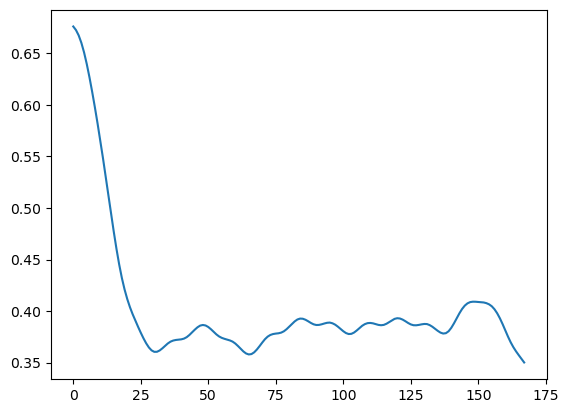

In [67]:
plt.plot(min_max_predictions) # Scaled predictions with min-max

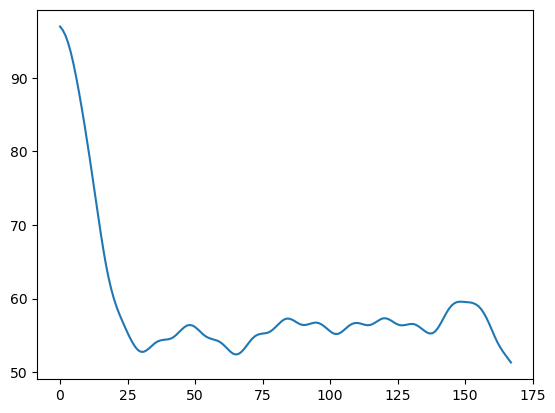

In [68]:
unscaled_min_max_predictions=scaler.inverse_transform(min_max_predictions)  # Unscaling for actual values

plt.plot(unscaled_min_max_predictions)

## Z-Score scaling

In [69]:
from sklearn import preprocessing    # For creating a standard scaler

scaler=preprocessing.StandardScaler()  # Creating standard scaler

In [70]:
z_score_oil_prices=scaler.fit_transform(non_scaled_oil_prices.reshape(-1, 1))  # Performing z-score scaling on numpy array


In [71]:
z_score_oil_prices.shape # len(z_score_oil_prices)

(5652, 1)

In [72]:
x_training_data=[]        # Initialising two data structures for the timesteps
y_training_data=[] 

In [73]:
for i in range(50, len(z_score_oil_prices)):               # Populating the data structures for the timesteps
               x_training_data.append(z_score_oil_prices[i-50:i, 0])
               y_training_data.append(z_score_oil_prices[i, 0])

In [74]:
x_training_data=np.array(x_training_data)              # Converting to numpy arrays
y_training_data=np.array(y_training_data)

print(x_training_data.shape)

(5602, 50)


In [75]:
print(y_training_data.shape)

(5602,)


In [76]:
print(len(z_score_oil_prices)-50)  # Confirm arrays have correct shape, len(min_max_oil_prices) - 50 = 5770

5602


In [77]:
x_training_data=np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1)) 

print(x_training_data.shape)    # Turning numpy array 3 dimensional for tensorflow

(5602, 50, 1)


In [78]:
rnn=Sequential()  # Initialising RNN

In [79]:
rnn.add(LSTM(units=5, return_sequences=True, input_shape=(x_training_data.shape[1], 1))) # Replicating same parameters as min-max scaling round

In [80]:
rnn.add(Dropout(0.2)) # Replicating same dropout rate as min-max scaling round

In [81]:
for i in [True, False]:            
    rnn.add(LSTM(units=5, return_sequences=i))
    rnn.add(Dropout(0.2))                            # Replicating number of LSTM layers with min-max round

In [82]:
rnn.add(Dense(units=1))   # Identical output layer as min-max round

In [83]:
rnn.compile(optimizer='adam', loss='mean_squared_error') # Same optimizer and loss function as min-max round

In [85]:
rnn.fit(x_training_data, y_training_data, epochs=10, batch_size=10)  # Fitting model to z-score scaled training data

Epoch 1/10
561/561 [==============================] - 63s 106ms/step - loss: 0.2846
Epoch 2/10
561/561 [==============================] - 58s 103ms/step - loss: 0.1238
Epoch 3/10
561/561 [==============================] - 60s 106ms/step - loss: 0.1169
Epoch 4/10
561/561 [==============================] - 59s 105ms/step - loss: 0.1179
Epoch 5/10
561/561 [==============================] - 55s 98ms/step - loss: 0.1196
Epoch 6/10
561/561 [==============================] - 59s 105ms/step - loss: 0.1071
Epoch 7/10
561/561 [==============================] - 59s 106ms/step - loss: 0.1077
Epoch 8/10
561/561 [==============================] - 56s 100ms/step - loss: 0.1075
Epoch 9/10
561/561 [==============================] - 59s 106ms/step - loss: 0.1084
Epoch 10/10
561/561 [==============================] - 59s 105ms/step - loss: 0.1060
